#Fire up graphlab create


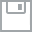
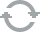
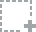
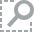
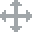
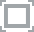
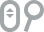
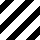
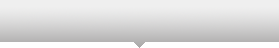
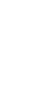
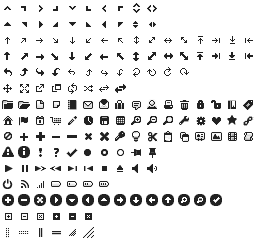
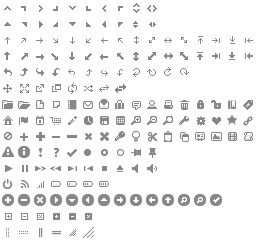
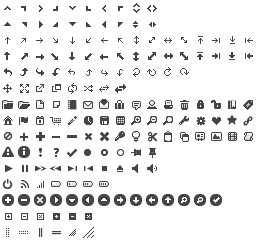
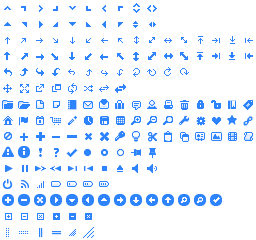
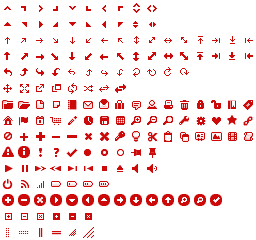
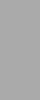
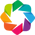
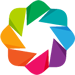


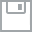
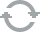
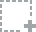
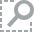
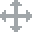
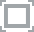
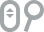
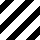
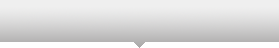
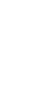
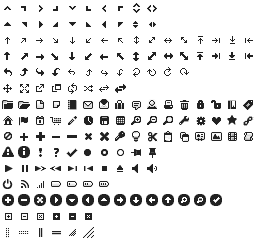
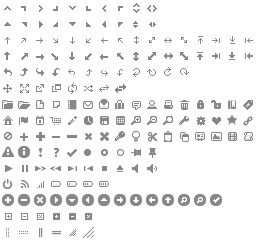
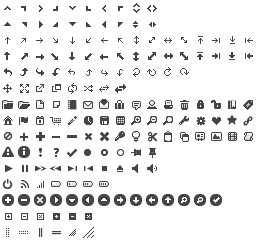
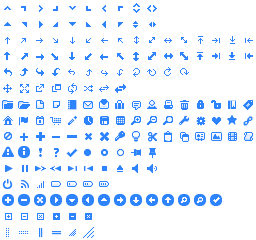
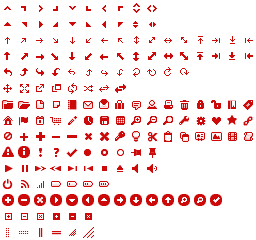
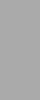
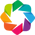
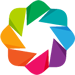

In [1]:
# import graphlab
import numpy as np
import pandas as pd
from bokeh import charts as bchart
from bokeh import plotting as bplot
bchart.output_notebook()
bplot.output_notebook()

#Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
# sales = graphlab.SFrame('home_data.gl/')

sales = pd.read_csv('home_data.csv')
sales['date'] = sales['date'].apply(lambda x: x[:8])
sales['zipcode'] = sales['zipcode'].apply(str)
sales['id'] = sales['id'].apply(str)
sales.columns 

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

#Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

In [3]:
#graphlab.canvas.set_target('ipynb')
#sales.show(view="Scatter Plot", x="sqft_living", y="price")
p = bchart.Scatter(sales, x="sqft_living", y="price")
bchart.show(p)

#Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [6]:
# train_data,test_data = sales.random_split(.8,seed=0)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    sales['sqft_living'], sales['price'], train_size = 0.8,  random_state=0)

# illustrate how the sample spreads
p = bplot.figure()
p.circle(x=X_train, y=y_train, 
         color = 'green', alpha=0.3, legend='train')
p.circle(x=X_test, y=y_test, 
         color = 'Red', alpha=0.5, legend='test')
bplot.show(p)

##Build the regression model using only sqft_living as a feature

In [7]:
#sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'],validation_set=None)
from sklearn import linear_model
sqft_model = linear_model.LinearRegression()
sqft_model.fit(X_train[:,np.newaxis], y_train) # when single varible is used, np.newaxis to add a axis

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#Evaluate the simple model

In [8]:
#print test_data['price'].mean()
y_test.mean()

529242.6106870229

In [9]:
#print sqft_model.evaluate(test_data)

from sklearn.metrics import mean_squared_error
y_pred = sqft_model.predict(X_test[:,np.newaxis])
print("Root of Mean squared error is $%d"  % np.sqrt(mean_squared_error(y_test, y_pred)))

def RMSE(y_actual, y_pred):
    rss = np.sum((y_actual - y_pred)**2)
    mse = rss / len(y_pred) # np.mean((y_train - y_pred)**2)
    return np.sqrt(mse)
RMSE(y_test, y_pred)

Root of Mean squared error is $248879


248879.06143647002

RMSE of about \$255,170!

#Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [ ]:
#import matplotlib.pyplot as plt
#%matplotlib inline

In [10]:
#plt.plot(test_data['sqft_living'],test_data['price'],'.',
#        test_data['sqft_living'],sqft_model.predict(test_data),'-')

p = bplot.figure()
p.circle(X_test, y_test)
p.line(X_test, sqft_model.predict(X_test[:,np.newaxis]), color='red')
bplot.show(p)

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [11]:
#sqft_model.get('coefficients')
sqft_model.coef_ , sqft_model.intercept_

(array([ 283.96855737]), -48257.063455563621)

#Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [12]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

# in scikit-learn you need to convert categorical variable into dummy/indicator variables
dummies = pd.get_dummies(sales['zipcode'], prefix='zipcode').iloc[:, 1:]
my_df = sales[my_features].drop('zipcode', axis=1)
my_df = pd.concat([my_df, dummies], axis=1)

In [ ]:
#sales[my_features].show()

# There is not suitable pandas command

In [13]:
# sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

p = bchart.BoxPlot(sales[['price', 'zipcode']], values='price', label='zipcode', color='zipcode')
bchart.show(p)

C:\Users\karibu\AppData\Local\Dato\Dato Launcher\lib\site-packages\bokeh\charts\_attributes.py:78: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort(columns=columns)


Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

#Build a regression model with more features

In [14]:
#my_features_model = graphlab.linear_regression.create(train_data,target='price',features=my_features,validation_set=None)
X_train, X_test, y_train, y_test = train_test_split(
    my_df, sales['price'], train_size = 0.8, random_state=0)
my_features_model = linear_model.LinearRegression()
my_features_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
#print my_features
for i, j in zip(my_df.columns, my_features_model.coef_):
    print(i, j)

('bedrooms', -45995.522423651375)
('bathrooms', 14003.90288979256)
('sqft_living', 277.47005631895098)
('sqft_lot', 0.24562413994649257)
('floors', -14946.955741951671)
('zipcode_98002', 23891.227882543375)
('zipcode_98003', 5013.6140809540666)
('zipcode_98004', 805649.26884252846)
('zipcode_98005', 332283.57129360648)
('zipcode_98006', 305516.36894100602)
('zipcode_98007', 273276.50883102318)
('zipcode_98008', 310897.38362320361)
('zipcode_98010', 66783.602938255761)
('zipcode_98011', 107214.5837200135)
('zipcode_98014', 85849.486719406486)
('zipcode_98019', 52082.765458046342)
('zipcode_98022', 27582.330680837826)
('zipcode_98023', -23479.10037407394)
('zipcode_98024', 147610.99691821664)
('zipcode_98027', 164934.97343850147)
('zipcode_98028', 121925.2160448119)
('zipcode_98029', 227624.46810803917)
('zipcode_98030', 2464.2158296465641)
('zipcode_98031', 8122.6751800538623)
('zipcode_98032', 25898.269418592245)
('zipcode_98033', 387782.29040544818)
('zipcode_98034', 223749.7771692300

##Comparing the results of the simple model with adding more features

In [16]:
#print sqft_model.evaluate(test_data)
#print my_features_model.evaluate(test_data)
y_pred = my_features_model.predict(X_test)
RMSE(y_test, y_pred)

171861.75510038584

The RMSE goes down from \$255,170 to \$179,508 with more features.

#Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [17]:
house1 = sales[sales['id']=='5309101200']

In [18]:
house1

id      date   price  bedrooms  bathrooms  sqft_living  \
1054  5309101200  20140605  620000         4       2.25         2400   

      sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
1054      5350     1.5           0     0     ...          7        1460   

      sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
1054            940      1929             0    98117  47.6763 -122.37   

      sqft_living15  sqft_lot15  
1054           1250        4880  

[1 rows x 21 columns]

<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [19]:
house1['price']

1054    620000
Name: price, dtype: int64

In [20]:
sqft_model.predict(house1['sqft_living'])

array([ 633267.47422744])

In [21]:
my_features_model.predict(my_df.loc[house1.index])

array([ 729764.03119733])

In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [22]:
house2 = sales[sales['id']=='1925069082']

In [23]:
house2

id      date    price  bedrooms  bathrooms  sqft_living  \
1361  1925069082  20150511  2200000         5       4.25         4640   

      sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
1361     22703       2           1     4     ...          8        2860   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1361           1780      1952             0    98052  47.6393 -122.097   

      sqft_living15  sqft_lot15  
1361           3140       14200  

[1 rows x 21 columns]

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [24]:
sqft_model.predict(house2['sqft_living'])

array([ 1269357.04273158])

In [25]:
my_features_model.predict(my_df[sales['id']=='1925069082'])

array([ 1238713.36000921])

In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

##Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [63]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}
df_bill_gates = my_df[sales['zipcode'] == bill_gates['zipcode'][0]].iloc[0]
for i in my_features:
    if i == 'zipcode':
        continue
    else:
        df_bill_gates[i] = bill_gates[i][0]
print df_bill_gates

bedrooms              8
bathrooms            25
sqft_living       50000
sqft_lot         225000
floors                4
zipcode_98002         0
zipcode_98003         0
zipcode_98004         0
zipcode_98005         0
zipcode_98006         0
zipcode_98007         0
zipcode_98008         0
zipcode_98010         0
zipcode_98011         0
zipcode_98014         0
zipcode_98019         0
zipcode_98022         0
zipcode_98023         0
zipcode_98024         0
zipcode_98027         0
zipcode_98028         0
zipcode_98029         0
zipcode_98030         0
zipcode_98031         0
zipcode_98032         0
zipcode_98033         0
zipcode_98034         0
zipcode_98038         0
zipcode_98039         1
zipcode_98040         0
                  ...  
zipcode_98092         0
zipcode_98102         0
zipcode_98103         0
zipcode_98105         0
zipcode_98106         0
zipcode_98107         0
zipcode_98108         0
zipcode_98109         0
zipcode_98112         0
zipcode_98115         0
zipcode_98116   

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [93]:
"our predicted result: {:,.2f}".format(my_features_model.predict(df_bill_gates)[0])

'our predicted result: 15,104,759.82'

The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)